In [160]:
# import libs
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from collections import Counter
warnings.filterwarnings('ignore')

In [161]:
# read data 
df = pd.read_csv("nypd-motor-vehicle-collisions.csv")

In [163]:
# data for basic analysis 
selected_columns = ['ACCIDENT DATE', 'ACCIDENT TIME', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']
df_selected  = df[selected_columns]
df_selected.head()

,ACCIDENT DATE,ACCIDENT TIME,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,2019-08-05T00:00:00.000,16:30,Sedan,Pick-up Truck
1,2019-08-27T00:00:00.000,16:02,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle
2,2019-08-15T00:00:00.000,17:57,Sedan,NaN
3,2019-08-30T00:00:00.000,21:53,Taxi,Station Wagon/Sport Utility Vehicle
4,2019-08-06T00:00:00.000,9:45,Station Wagon/Sport Utility Vehicle,Bike


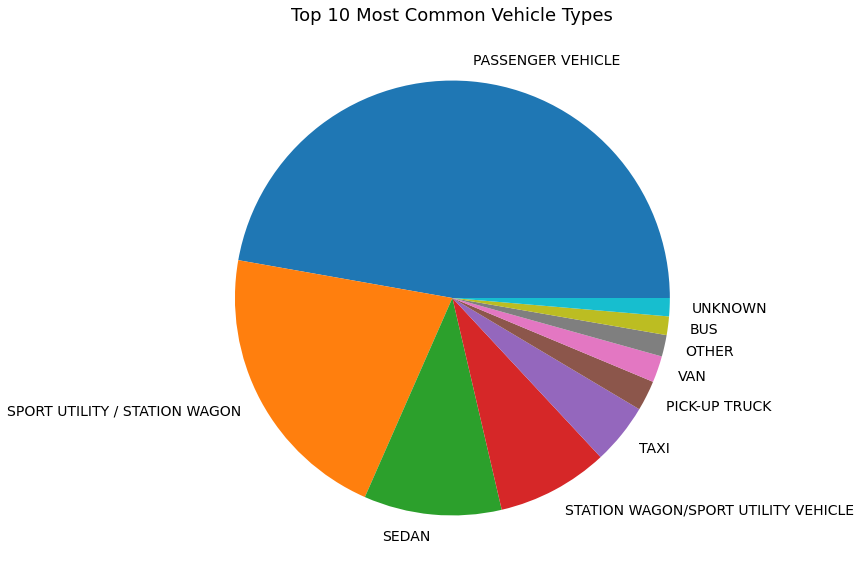

In [164]:
# Pie chart for viechle types
df_selected["VEHICLE TYPE CODE 1"] = df_selected["VEHICLE TYPE CODE 1"].str.upper()
fig = plt.figure(figsize = (10, 10))
ax = fig.subplots()
df_selected["VEHICLE TYPE CODE 1"].value_counts()[:10].plot(ax=ax, kind = "pie", textprops={'fontsize': 14})
ax.set_ylabel("")
ax.set_title("Top 10 Most Common Vehicle Types", fontsize=18)
plt.show()

In [165]:
# get day of week from date
df_selected['ACCIDENT DATE'] = df_selected['ACCIDENT DATE'].str[:10]
df_selected['ACCIDENT DATE'] = pd.to_datetime(df_selected['ACCIDENT DATE'], yearfirst = True)
df_selected['DAY OF WEEK'] = df_selected['ACCIDENT DATE'].dt.day_name()

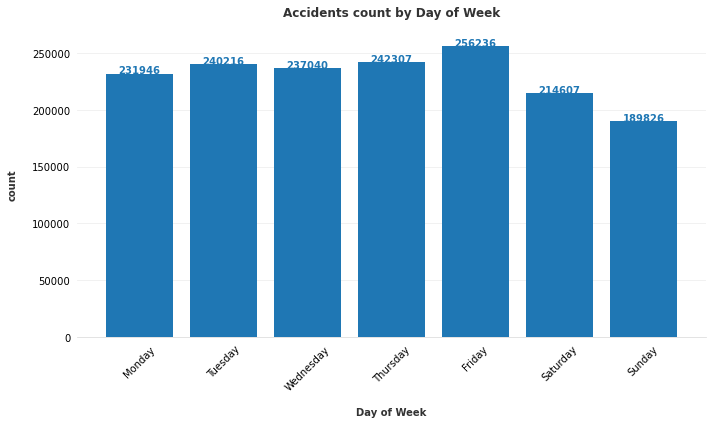

In [166]:
# plot total accidents by day of week
counts = df_selected["DAY OF WEEK"].value_counts()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
counts =[counts.Monday, counts.Tuesday, counts.Wednesday, counts.Thursday, counts.Friday, counts.Saturday, counts.Sunday]

fig, ax = plt.subplots()
plt.xticks(rotation=45)
fig.set_size_inches(10, 6)
# Save the chart so we can loop through the bars below.
bars = ax.bar(
    x=days,
    height=counts
)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
bar_color = bars[0].get_facecolor()
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=bar_color,
      weight='bold'
  )

# Add labels and a title. Note the use of `labelpad` and `pad` to add some
# extra space between the text and the tick labels.
ax.set_xlabel('Day of Week', labelpad=15, color='#333333', weight='bold')
ax.set_ylabel('count', labelpad=15, color='#333333', weight='bold')
ax.set_title('Accidents count by Day of Week', pad=15, color='#333333',
             weight='bold')

fig.tight_layout()

In [167]:
df_selected["HOUR"] = pd.to_numeric(pd.to_datetime(df['ACCIDENT TIME'], format='%H:%M').dt.hour)
df_selected.head()

,ACCIDENT DATE,ACCIDENT TIME,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,DAY OF WEEK,HOUR
0,2019-08-05,16:30,SEDAN,Pick-up Truck,Monday,16
1,2019-08-27,16:02,STATION WAGON/SPORT UTILITY VEHICLE,Station Wagon/Sport Utility Vehicle,Tuesday,16
2,2019-08-15,17:57,SEDAN,NaN,Thursday,17
3,2019-08-30,21:53,TAXI,Station Wagon/Sport Utility Vehicle,Friday,21
4,2019-08-06,9:45,STATION WAGON/SPORT UTILITY VEHICLE,Bike,Tuesday,9


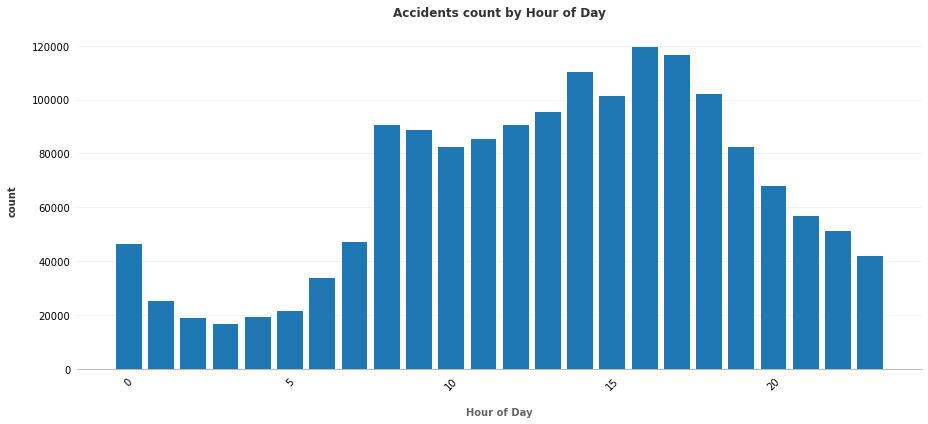

In [172]:
# plot total accidents by day of week
keys = Counter(df_selected["HOUR"]).keys()
counts = Counter(df_selected["HOUR"]).values()

fig, ax = plt.subplots()
plt.xticks(rotation=45)
fig.set_size_inches(13, 6)
# Save the chart so we can loop through the bars below.
bars = ax.bar(
    keys,
    counts
)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#AAAAAA')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)


# Add labels and a title. Note the use of `labelpad` and `pad` to add some
# extra space between the text and the tick labels.
ax.set_xlabel('Hour of Day', labelpad=15, color='#666666', weight='bold')
ax.set_ylabel('count', labelpad=15, color='#333333', weight='bold')
ax.set_title('Accidents count by Hour of Day', pad=15, color='#333333',
             weight='bold')

fig.tight_layout()

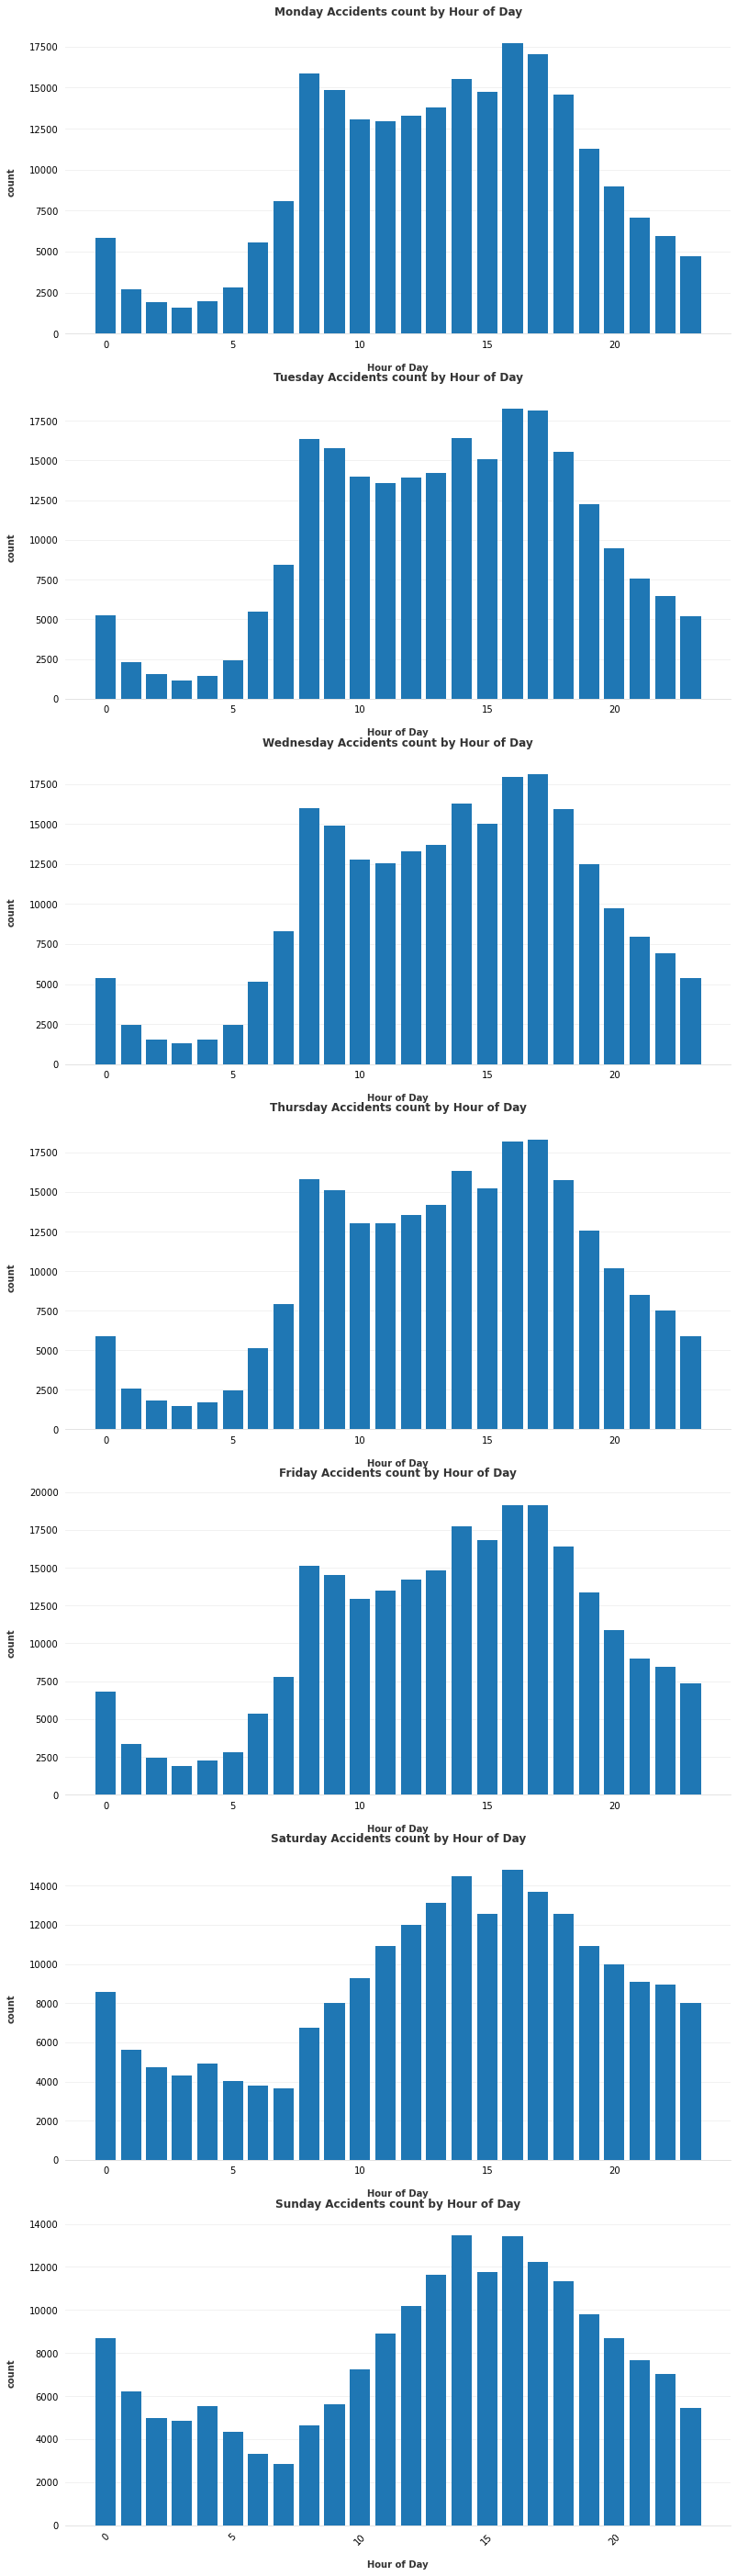

In [176]:
# hour of day contidion on week of day
fig, axs = plt.subplots(7)
plt.xticks(rotation=45)
fig.set_size_inches(13, 50)

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i in range(0, len(days)):
    ax = axs[i]
    keys = Counter(df_selected[df_selected["DAY OF WEEK"] == days[i]]["HOUR"] ).keys()
    counts = Counter(df_selected[df_selected["DAY OF WEEK"] == days[i]]["HOUR"]).values()
    bars = ax.bar(
    keys,
    counts)
    # Axis formatting.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(False)


    # Add labels and a title. Note the use of `labelpad` and `pad` to add some
    # extra space between the text and the tick labels.
    ax.set_xlabel('Hour of Day', labelpad=15, color='#333333', weight='bold')
    ax.set_ylabel('count', labelpad=15, color='#333333', weight='bold')
    ax.set_title(days[i] + ' Accidents count by Hour of Day', pad=15, color='#333333',
                 weight='bold') 

    
# fig.tight_layout()